A data set from English premier league has been taken with betting information from 3 different sites, the target was to access the relationship of betting point and the final result, final result is shown in the data in 2 different ways, first as "result of the match" in "Home win, Away win or Draw", and second is as "Goal difference", the first one is multiple classification type problem, and second one is regression type, so it might be a good excercise to see how same features perform to predcit both classification and regression type of problem. This data set is not "ideal" for supervised machine learning excercise compared to the other data set available on line (like in google, kaggle or UCI data repository), but idea was to take one which is not ideally prepared.

first step here is to import important libraries like numpy, pandas, then importing the data file.lot of libraries were imported one by one during the total coding process, its a iterative process. Also the data set is downloaded.

In [1046]:
import numpy as np
import pandas as pd
#from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import scipy as sp
from numpy import array
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
pl = pd.read_csv(r"D:\NTNU\3rd Semester\TØL4204 Flexible Automation and Artificial Intelligence (2021 HØST)\Premier_league.csv")
pl

,Div,Date,HomeTeam,AwayTeam,Full Time Home Goal,Full Time Away Goal,Full Time Result,Full Time Goal Difference,Half Time Home Goal,Half Time Away Goal,...,Away Red Card,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA
0,E0,12/9/2020,Fulham,Arsenal,0,3,A,3,0,1,...,0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57
1,E0,12/9/2020,Crystal Palace,Southampton,1,0,H,1,1,0,...,0,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40
2,E0,12/9/2020,Liverpool,Leeds,4,3,H,1,3,2,...,0,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50
3,E0,12/9/2020,West Ham,Newcastle,0,2,A,2,0,0,...,0,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40
4,E0,13/09/2020,West Brom,Leicester,0,3,A,3,0,0,...,0,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,E0,13/05/2018,Newcastle,Chelsea,3,0,H,3,1,0,...,0,6.50,4.20,1.60,6.50,4.10,1.53,4.50,4.00,1.70
1516,E0,13/05/2018,Southampton,Man City,0,1,A,1,0,0,...,0,9.00,5.00,1.39,7.25,4.75,1.42,7.20,4.40,1.45
1517,E0,13/05/2018,Swansea,Stoke,1,2,A,1,1,2,...,0,1.90,3.79,4.20,1.83,3.75,4.25,1.90,3.50,4.10
1518,E0,13/05/2018,Tottenham,Leicester,5,4,H,1,1,2,...,0,1.33,6.00,9.00,1.30,5.75,9.25,1.30,5.50,9.50


next step: checking some basic information, for example, how many rows and columns the file has

In [1047]:
pl.shape

(1520, 33)

To find the value of a specific column or row, we can use below code, it might be beneficial to look closely but in a isolated way

In [1048]:
firstcol = pl.iloc[:, 0]
firstcol

0       E0
1       E0
2       E0
3       E0
4       E0
        ..
1515    E0
1516    E0
1517    E0
1518    E0
1519    E0
Name: Div, Length: 1520, dtype: object

In [1049]:
firstrow = pl.iloc[0, :]
firstrow

Div                                  E0
Date                          12/9/2020
HomeTeam                         Fulham
AwayTeam                        Arsenal
Full Time Home Goal                   0
Full Time Away Goal                   3
Full Time Result                      A
Full Time Goal Difference             3
Half Time Home Goal                   0
Half Time Away Goal                   1
Half Time Result                      A
Referee                      C Kavanagh
Home Shot on Goal                     5
Away Shot on Goal                    13
Home Shot on Target                   2
Away Shot on Target                   6
Home Foul                            12
Away Foul                            12
Home Corner                           2
Away Corner                           3
Home Yellow Card                      2
Away Yellow Card                      2
Home Red Card                         0
Away Red Card                         0
B365H                               6.0


a  good way to get an overview of the data set, is there any blank cells, or which column contains which type of data

In [1050]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Div                        1520 non-null   object 
 1   Date                       1520 non-null   object 
 2   HomeTeam                   1520 non-null   object 
 3   AwayTeam                   1520 non-null   object 
 4   Full Time Home Goal        1520 non-null   int64  
 5   Full Time Away Goal        1520 non-null   int64  
 6   Full Time Result           1520 non-null   object 
 7   Full Time Goal Difference  1520 non-null   int64  
 8   Half Time Home Goal        1520 non-null   int64  
 9   Half Time Away Goal        1520 non-null   int64  
 10  Half Time Result           1520 non-null   object 
 11  Referee                    1520 non-null   object 
 12  Home Shot on Goal          1520 non-null   int64  
 13  Away Shot on Goal          1520 non-null   int64

next step: to get an overview of the columns (or attributes), if there is any missing value in any column it can be found from here, but the problem is the columns is shown here are only those which contain numerical value, this is not fruitful to check the columns which contains string

In [1051]:
pl.describe ()

,Full Time Home Goal,Full Time Away Goal,Full Time Goal Difference,Half Time Home Goal,Half Time Away Goal,Home Shot on Goal,Away Shot on Goal,Home Shot on Target,Away Shot on Target,Home Foul,...,Away Red Card,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,...,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,1.492105,1.236842,1.457895,0.663158,0.561184,13.465789,11.191447,4.626974,3.943421,10.519737,...,0.066447,3.109053,4.356500,5.018349,3.035164,4.248954,4.829164,2.972007,4.154178,4.621211
std,1.307271,1.205303,1.259932,0.842243,0.772431,5.651861,4.916236,2.625832,2.338832,3.418323,...,0.259499,2.601597,1.614897,4.847884,2.404857,1.464826,4.504842,2.221142,1.325320,4.117684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.060000,3.000000,1.120000,1.050000,2.900000,1.130000,1.070000,2.700000,1.120000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,8.000000,...,0.000000,1.650000,3.400000,2.200000,1.650000,3.400000,2.200000,1.670000,3.350000,2.200000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,10.000000,...,0.000000,2.290000,3.750000,3.300000,2.250000,3.700000,3.300000,2.300000,3.600000,3.200000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,13.000000,...,0.000000,3.300000,4.500000,5.750000,3.300000,4.500000,5.500000,3.300000,4.412500,5.200000
max,9.000000,9.000000,9.000000,5.000000,5.000000,36.000000,30.000000,15.000000,15.000000,23.000000,...,2.000000,23.000000,17.000000,41.000000,21.000000,14.000000,41.000000,20.000000,12.000000,30.000000


Another way to find the number of null value in each column is as below. But here I find a problem, it shows 1 blank cell in column "Referee", but there is actually no blank cell, this also confirmed by the next code where target was to find the specific cell, plz advise how to rectify this problem (i didnt find any idea how it might happen)

In [1052]:
df.isnull().sum()

Div                    0
Date                   0
HomeTeam               0
AwayTeam               0
Full Time Home Goal    0
Full Time Away Goal    0
Full Time Resuslt      0
Half Time Home Goal    0
Half Time Away Goal    0
Half Time Result       0
Referee                1
Home Shot on Goal      0
Away Shot on Goal      0
Home Shot on Target    0
Away Shot on Target    0
Home Foul              0
Away Foul              0
Home Corner            0
Away Corner            0
Home Yellow Card       0
Away Yellow Card       0
Home Red Card          0
Away Red Card          0
B365H                  0
B365D                  0
B365A                  0
BWH                    0
BWD                    0
BWA                    0
IWH                    0
IWD                    0
IWA                    0
dtype: int64

next step: try to found if there is any blank cell anywhere? Though from pl.info command we get the answer, but if there any null cells then below command can give specific location

In [1053]:
np.where(pd.isnull(pl))

(array([], dtype=int64), array([], dtype=int64))

fortunately have no blank cell in the file, but if any then it can be filled up with a value with below code.

In [1054]:
#pl.replace(np.nan, 'missing', regex=True)

Finding duplicate row

In [1055]:
duplicate_rows_pl = pl[pl.duplicated()]
print("number of duplicate rows: ", duplicate_rows_pl.shape)

number of duplicate rows:  (0, 33)


Try to find unique value in a column

In [978]:
#sorted(pl["Full Time Result"].unique().tolist())

Now replacing those values with some other values

In [979]:
pl["Full Time Result"].unique()

array(['A', 'H', 'D'], dtype=object)

In [980]:
keys1 = range (len(pl["Full Time Result"].unique()))
values1 = sorted(pl["Full Time Result"].unique().tolist())
dic1 =  dict(zip(values1, keys1))
pl["Full Time Result"].replace(dic1, inplace=True)
pl

,Div,Date,HomeTeam,AwayTeam,Full Time Home Goal,Full Time Away Goal,Full Time Result,Full Time Goal Difference,Half Time Home Goal,Half Time Away Goal,...,Away Red Card,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA
0,E0,12/9/2020,Fulham,Arsenal,0,3,0,3,0,1,...,0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57
1,E0,12/9/2020,Crystal Palace,Southampton,1,0,2,1,1,0,...,0,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40
2,E0,12/9/2020,Liverpool,Leeds,4,3,2,1,3,2,...,0,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50
3,E0,12/9/2020,West Ham,Newcastle,0,2,0,2,0,0,...,0,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40
4,E0,13/09/2020,West Brom,Leicester,0,3,0,3,0,0,...,0,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,E0,13/05/2018,Newcastle,Chelsea,3,0,2,3,1,0,...,0,6.50,4.20,1.60,6.50,4.10,1.53,4.50,4.00,1.70
1516,E0,13/05/2018,Southampton,Man City,0,1,0,1,0,0,...,0,9.00,5.00,1.39,7.25,4.75,1.42,7.20,4.40,1.45
1517,E0,13/05/2018,Swansea,Stoke,1,2,0,1,1,2,...,0,1.90,3.79,4.20,1.83,3.75,4.25,1.90,3.50,4.10
1518,E0,13/05/2018,Tottenham,Leicester,5,4,2,1,1,2,...,0,1.33,6.00,9.00,1.30,5.75,9.25,1.30,5.50,9.50


In [981]:
keys2 = range (len(pl["HomeTeam"].unique()))
values2 = sorted (pl["HomeTeam"].unique().tolist())
dic2 =  dict(zip(values2, keys2))
pl["HomeTeam"].replace(dic2, inplace=True)
pl

,Div,Date,HomeTeam,AwayTeam,Full Time Home Goal,Full Time Away Goal,Full Time Result,Full Time Goal Difference,Half Time Home Goal,Half Time Away Goal,...,Away Red Card,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA
0,E0,12/9/2020,9,Arsenal,0,3,0,3,0,1,...,0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57
1,E0,12/9/2020,7,Southampton,1,0,2,1,1,0,...,0,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40
2,E0,12/9/2020,13,Leeds,4,3,2,1,3,2,...,0,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50
3,E0,12/9/2020,25,Newcastle,0,2,0,2,0,0,...,0,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40
4,E0,13/09/2020,24,Leicester,0,3,0,3,0,0,...,0,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,E0,13/05/2018,16,Chelsea,3,0,2,3,1,0,...,0,6.50,4.20,1.60,6.50,4.10,1.53,4.50,4.00,1.70
1516,E0,13/05/2018,19,Man City,0,1,0,1,0,0,...,0,9.00,5.00,1.39,7.25,4.75,1.42,7.20,4.40,1.45
1517,E0,13/05/2018,21,Stoke,1,2,0,1,1,2,...,0,1.90,3.79,4.20,1.83,3.75,4.25,1.90,3.50,4.10
1518,E0,13/05/2018,22,Leicester,5,4,2,1,1,2,...,0,1.33,6.00,9.00,1.30,5.75,9.25,1.30,5.50,9.50


In [982]:
pl["AwayTeam"].replace(dic2, inplace=True)
pl

,Div,Date,HomeTeam,AwayTeam,Full Time Home Goal,Full Time Away Goal,Full Time Result,Full Time Goal Difference,Half Time Home Goal,Half Time Away Goal,...,Away Red Card,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA
0,E0,12/9/2020,9,0,0,3,0,3,0,1,...,0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57
1,E0,12/9/2020,7,19,1,0,2,1,1,0,...,0,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40
2,E0,12/9/2020,13,11,4,3,2,1,3,2,...,0,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50
3,E0,12/9/2020,25,16,0,2,0,2,0,0,...,0,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40
4,E0,13/09/2020,24,12,0,3,0,3,0,0,...,0,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,E0,13/05/2018,16,6,3,0,2,3,1,0,...,0,6.50,4.20,1.60,6.50,4.10,1.53,4.50,4.00,1.70
1516,E0,13/05/2018,19,14,0,1,0,1,0,0,...,0,9.00,5.00,1.39,7.25,4.75,1.42,7.20,4.40,1.45
1517,E0,13/05/2018,21,20,1,2,0,1,1,2,...,0,1.90,3.79,4.20,1.83,3.75,4.25,1.90,3.50,4.10
1518,E0,13/05/2018,22,12,5,4,2,1,1,2,...,0,1.33,6.00,9.00,1.30,5.75,9.25,1.30,5.50,9.50


Checking is it actually changed as required or any problem occured

In [983]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Div                        1520 non-null   object 
 1   Date                       1520 non-null   object 
 2   HomeTeam                   1520 non-null   int64  
 3   AwayTeam                   1520 non-null   int64  
 4   Full Time Home Goal        1520 non-null   int64  
 5   Full Time Away Goal        1520 non-null   int64  
 6   Full Time Result           1520 non-null   int64  
 7   Full Time Goal Difference  1520 non-null   int64  
 8   Half Time Home Goal        1520 non-null   int64  
 9   Half Time Away Goal        1520 non-null   int64  
 10  Half Time Result           1520 non-null   object 
 11  Referee                    1520 non-null   object 
 12  Home Shot on Goal          1520 non-null   int64  
 13  Away Shot on Goal          1520 non-null   int64

Searching outlier, an example

<AxesSubplot:xlabel='B365H'>

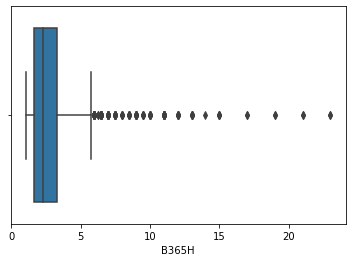

In [1025]:
sns.boxplot(x=pl["B365H"])

in this step, the irrelevent columns will be dropped from the data set, only the columns relevant for the assessment of output will be kept, though it is done manually, but it should be done like the imporatnce qof all column should be calculate and then the irrelevant or loosely relavent columns should be dropped, it improve the efficiency and speed of the model most often.

In [984]:
drop_columns = ["Div", "Date", "Full Time Result", "Full Time Home Goal", "Full Time Away Goal", "Full Time Goal Difference", "Referee", "Half Time Home Goal", "Half Time Away Goal", "Half Time Result", "Home Shot on Goal", "Away Shot on Goal", "Home Shot on Target", "Away Shot on Target", "Home Foul", "Away Foul", "Home Corner", "Away Corner", "Home Yellow Card", "Away Yellow Card", "Home Red Card", "Away Red Card"]
y1 = pl ["Full Time Result"]
y1

0       0
1       2
2       2
3       0
4       0
       ..
1515    2
1516    0
1517    0
1518    2
1519    2
Name: Full Time Result, Length: 1520, dtype: int64

In [985]:
X1 = pl.drop(columns = drop_columns)
X1

,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA
0,9,0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57
1,7,19,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40
2,13,11,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50
3,25,16,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40
4,24,12,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00
...,...,...,...,...,...,...,...,...,...,...,...
1515,16,6,6.50,4.20,1.60,6.50,4.10,1.53,4.50,4.00,1.70
1516,19,14,9.00,5.00,1.39,7.25,4.75,1.42,7.20,4.40,1.45
1517,21,20,1.90,3.79,4.20,1.83,3.75,4.25,1.90,3.50,4.10
1518,22,12,1.33,6.00,9.00,1.30,5.75,9.25,1.30,5.50,9.50


in this step, just try to find out the rows with outlier, in practical cases those rows should be excluded to improve the model accuracy, but in this case it is kept as it is as the data set is not big

In [1056]:
Q1 = X1.quantile(0.25)
Q3 = X1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

HomeTeam    13.0000
AwayTeam    13.0000
B365H        1.6500
B365D        1.1000
B365A        3.5500
BWH          1.6500
BWD          1.1000
BWA          3.3000
IWH          1.6300
IWD          1.0625
IWA          3.0000
dtype: float64


In [1057]:
pl2 = X1[~((X1 < (Q1 - 1.5 * IQR)) |(X1 > (Q3 + 1.5 * IQR))).any(axis=1)]
pl2.shape

(1191, 11)

Trying to create a  heatmap to identify the relanvance of the features, but unfortunately most of the features are not that much correleated.

<AxesSubplot:>

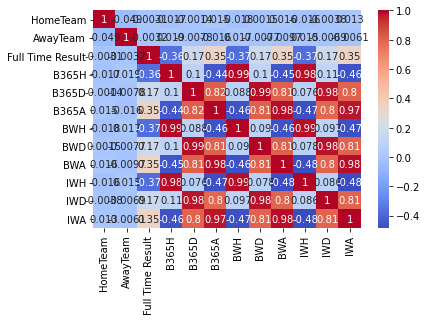

In [986]:
drop_columns1 = ["Div", "Date", "Full Time Home Goal", "Full Time Away Goal", "Full Time Goal Difference", "Referee", "Half Time Home Goal", "Half Time Away Goal", "Half Time Result", "Home Shot on Goal", "Away Shot on Goal", "Home Shot on Target", "Away Shot on Target", "Home Foul", "Away Foul", "Home Corner", "Away Corner", "Home Yellow Card", "Away Yellow Card", "Home Red Card", "Away Red Card"]
pl_edited = pl.drop(columns = drop_columns1)
corr = pl_edited.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

A good way to visualize the realationship of 2 column is scatter plot, below is just an example

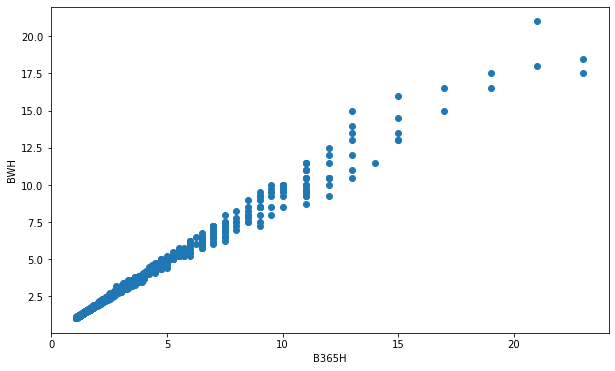

In [1041]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.scatter(df["B365H"], df["BWH"])
ax1.set_xlabel("B365H")
ax1.set_ylabel("BWH")
plt.show()

From here the training and testing of models have been started, in first step, the y is taken as the "Full Time results", which is a classification type problem.4 methods have been tested.

In [987]:
X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, test_size=0.2, random_state=42)
X1_train.shape

(1216, 11)

In [988]:
estimator1 = DecisionTreeClassifier(random_state=24)
estimator1.fit(X1_train, y1_train)

DecisionTreeClassifier(random_state=24)

In [989]:
y1_pred1 = estimator1.predict(X1_test)
y1_pred1

array([0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 1, 0, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2,
       1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 2,
       1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2,
       2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2, 2,
       1, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2,
       2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2,
       0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2,

In [990]:
print (np.sum(y1_test == y1_pred1), len(y1_pred1))

137 304


In [991]:
print("Accuracy is {}%".format (round(np.sum(y1_test == y1_pred1)*100/len(y1_pred1), 2)))

Accuracy is 45.07%


In [992]:
estimator2 = RandomForestClassifier(random_state=24)
estimator2.fit(X1_train, y1_train)
y1_pred2 = estimator2.predict(X1_test)
y1_pred2

array([0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0,
       2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2,
       1, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 1,

In [993]:
print("{} out of {} is correctly predicted, Accuracy is {}%".format (np.sum(y1_test == y1_pred2), len(y1_pred2),(round(np.sum(y1_test == y1_pred2)*100/len(y1_pred2), 2))))

153 out of 304 is correctly predicted, Accuracy is 50.33%


In [994]:
estimator3 = AdaBoostClassifier(random_state=24)
estimator3.fit(X1_train, y1_train)
y1_pred3 = estimator3.predict(X1_test)
y1_pred3

array([2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2,
       2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2,

In [995]:
print("{} out of {} is correctly predicted, Accuracy is {}%".format (np.sum(y1_test == y1_pred3), len(y1_pred3),(round(np.sum(y1_test == y1_pred3)*100/len(y1_pred3), 2))))

153 out of 304 is correctly predicted, Accuracy is 50.33%


In [996]:
estimator4 = SVC(random_state=24)
estimator4.fit(X1_train, y1_train)
y1_pred4 = estimator4.predict(X1_test)
y1_pred4

array([2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [997]:
print("{} out of {} is correctly predicted, Accuracy is {}%".format (np.sum(y1_test == y1_pred4), len(y1_pred4),(round(np.sum(y1_test == y1_pred4)*100/len(y1_pred4), 2))))

162 out of 304 is correctly predicted, Accuracy is 53.29%


A comparison of results obtained from different method

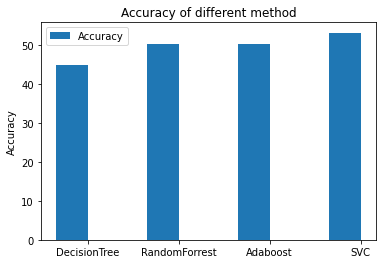

In [1039]:
methods = ['DecisionTree', 'RandomForrest', 'Adaboost', 'SVC']
accuracy = [45.07, 50.33, 50.33, 53.29]
x = np.arange(len(methods))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of different method')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

Now the y has been changed to "Full time goal difference", which is actually a interger type data, so the problem is now regression type, but here one difficulties has been found, model used for predictions return float type value, but we need int type value, couldnt found a good way to predict int type (excpet rounding the output, but this is not a good way i guess), please share if you have any suggestion.

In [998]:
y2 = pl ["Full Time Goal Difference"]
y2

0       3
1       1
2       1
3       2
4       3
       ..
1515    3
1516    1
1517    1
1518    1
1519    2
Name: Full Time Goal Difference, Length: 1520, dtype: int64

In [999]:
X1_train, X1_test, y2_train, y2_test = train_test_split (X1, y2, test_size=0.2, random_state=42)
X1_train.shape

(1216, 11)

In [1000]:
estimators_r = {
    'linear': LinearRegression(),
    'lasso': Lasso(),
    'ridge': Ridge(),
    'k_nearest': KNeighborsRegressor(n_neighbors=4),
}

In [1001]:
n_total = len(y2_test)

for k, estimator in estimators_r.items():

    estimator.fit(X1_train, y2_train)
    
    y2_pred_r = estimator.predict(X1_test)
    
    r2 = r2_score(y2_test, y2_pred_r)
        
    print(k)
    print('R2 = {:.3f}'.format(r2))
    print()
      

linear
R2 = 0.116

lasso
R2 = 0.011

ridge
R2 = 0.116

k_nearest
R2 = -0.129



In [1002]:
estimators_c = {
    'decision_tree': DecisionTreeClassifier(random_state=24),
    'random_forest': RandomForestClassifier(random_state=24),
    'adaboost': AdaBoostClassifier(random_state=24),
    'svm': SVC(random_state=24),
}

In [1003]:
for k, estimator in estimators_c.items():

    estimator.fit(X1_train, y2_train)
    
    y_pred_c = estimator.predict(X1_test)
    
    acc = accuracy_score(y2_test, y_pred_c)
    
    n_matches = np.sum(y2_test == y_pred_c)
    
    print(k)
    print('Number of matches: {} out of {} (accuracy = {:.3f})'.format(n_matches, n_total, acc))
    print()

decision_tree
Number of matches: 86 out of 304 (accuracy = 0.283)

random_forest
Number of matches: 102 out of 304 (accuracy = 0.336)

adaboost
Number of matches: 112 out of 304 (accuracy = 0.368)

svm
Number of matches: 117 out of 304 (accuracy = 0.385)



In [1004]:
y2_test

461     1
1314    3
1472    1
744     1
247     3
       ..
233     3
481     0
196     1
1278    1
81      1
Name: Full Time Goal Difference, Length: 304, dtype: int64

In this stage, 2 more columns have been dropped, for which the range of value were broad then the other columns, but the result doesnt improved (in fact worse then previous), this is just a trail to see what can actually happen, to avoid the big variation of values in different column i understand I should use "scaler" function, this type of approach is not workable at all.

In [1005]:
new_drop_columns = ["Div", "Date", "Full Time Result", "Full Time Home Goal", "Full Time Away Goal", "Full Time Goal Difference", "Referee", "Half Time Home Goal", "Half Time Away Goal", "Half Time Result", "Home Shot on Goal", "Away Shot on Goal", "Home Shot on Target", "Away Shot on Target", "Home Foul", "Away Foul", "Home Corner", "Away Corner", "Home Yellow Card", "Away Yellow Card", "Home Red Card", "Away Red Card", "HomeTeam", "AwayTeam"]
Xa = pl.drop(columns = new_drop_columns)
Xa

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA
0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57
1,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40
2,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50
3,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40
4,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00
...,...,...,...,...,...,...,...,...,...
1515,6.50,4.20,1.60,6.50,4.10,1.53,4.50,4.00,1.70
1516,9.00,5.00,1.39,7.25,4.75,1.42,7.20,4.40,1.45
1517,1.90,3.79,4.20,1.83,3.75,4.25,1.90,3.50,4.10
1518,1.33,6.00,9.00,1.30,5.75,9.25,1.30,5.50,9.50


In [1006]:
Xa_train, Xa_test, y1_train, y1_test = train_test_split (Xa, y1, test_size=0.2, random_state=42)

In [1007]:
estimator1a = DecisionTreeClassifier(random_state=24)
estimator1a.fit(Xa_train, y1_train)
y1_pred1a = estimator1a.predict(Xa_test)
print("Accuracy is {}%".format (round(np.sum(y1_test == y1_pred1a)*100/len(y1_pred1a), 2)))

Accuracy is 39.8%
